In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols

1. EDA
2. anova analysis 
3. naive bayes 

In [11]:
crime=pd.read_csv("CRIME2.csv")

In [3]:
crime.head(71)

,Victim_age,Victim_gender,Suspect_age,Suspect_gender_identified,Suspect_known_status,Suspect_count,Victim_religion,Police_station,Crime
0,25,Female,NaN,both,known,4,Muslim,Daighar,domestic violence
1,14,Female,19.0,Male,known,1,Muslim,Daighar,sexual assault of minor
2,17,Female,NaN,unknown,unknown,1,Muslim,Daighar,kidnapping
3,12,Female,31.0,Male,known,1,Hindu,Daighar,rape of minor
4,16,Female,NaN,unknown,unknown,1,Muslim,Daighar,kidnapping
...,...,...,...,...,...,...,...,...,...
65,37,Female,17.0,Male,known,1,Hindu,Rabodi,sexual assault
66,24,Female,NaN,both,known,3,Muslim,Rabodi,domestic violence
67,26,Female,NaN,both,known,4,Muslim,Rabodi,domestic violence
68,39,Female,NaN,Male,known,2,Hindu,Rabodi,domestic violence


In [4]:
print(crime.describe())

       Victim_age  Suspect_age  Suspect_count
count   70.000000    43.000000      70.000000
mean    26.357143    30.255814       1.514286
std     10.775759    12.016047       0.880429
min      2.000000    14.000000       1.000000
25%     17.000000    21.500000       1.000000
50%     24.000000    28.000000       1.000000
75%     36.750000    36.000000       2.000000
max     57.000000    76.000000       4.000000


In [5]:
print(crime.isnull().sum())

Victim_age                    0
Victim_gender                 0
Suspect_age                  27
Suspect_gender_identified     0
Suspect_known_status          0
Suspect_count                 0
Victim_religion               0
Police_station                0
Crime                         0
dtype: int64


In [6]:
crime.Crime.unique()

array(['domestic violence', 'sexual assault of minor', 'kidnapping',
       'rape of minor', 'murder', 'attempted murder', 'rape',
       'sexual assault', 'cyber defamation', 'kidnapping of minor',
       'rape and cyber defamation', 'robbery', 'assault',
       'assault and robbery'], dtype=object)

# Exploratory Data Analysis

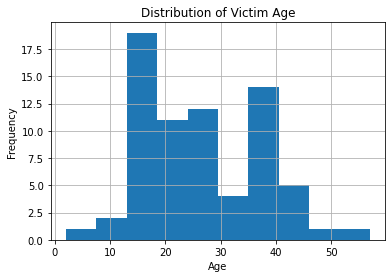

In [7]:
# Histogram
crime['Victim_age'].hist()
plt.title('Distribution of Victim Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

D:\Downloads\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<Axes: xlabel='Victim_age', ylabel='Density'>

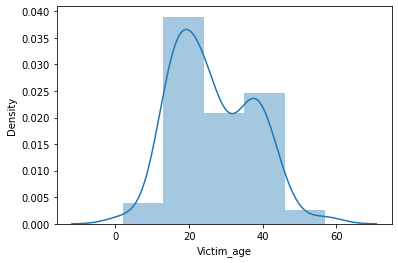

In [9]:
sns.distplot(crime['Victim_age'],bins=5) 

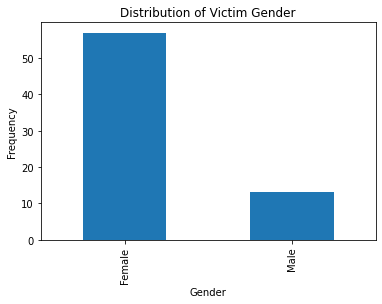

In [12]:
# Bar charts for categorical variables
crime['Victim_gender'].value_counts().plot(kind='bar')
plt.title('Distribution of Victim Gender')
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.show()

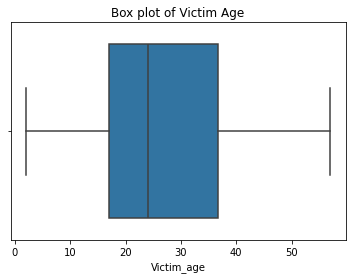

In [13]:
# Box plot for numeric variables
sns.boxplot(x=crime['Victim_age'])
plt.title('Box plot of Victim Age')
plt.show()

In [16]:
cross_tab = pd.crosstab(crime['Victim_gender'], crime['Crime'])
cross_tab

Crime,assault,assault and robbery,attempted murder,cyber defamation,domestic violence,kidnapping,kidnapping of minor,murder,rape,rape and cyber defamation,rape of minor,robbery,sexual assault,sexual assault of minor
Victim_gender,,,,,,,,,,,,,,
Female,2,0,1,3,8,4,1,1,6,2,5,6,8,10
Male,0,2,4,0,0,0,0,2,0,0,0,5,0,0


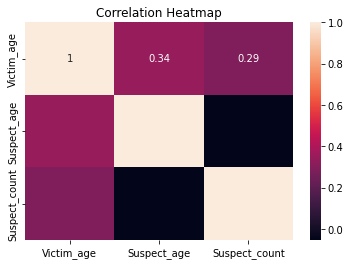

In [21]:
# Correlation heatmap
sns.heatmap(crime.corr(), annot=True)
plt.title('Correlation Heatmap')
plt.show()

<AxesSubplot:xlabel='Suspect_gender_identified', ylabel='Crime'>

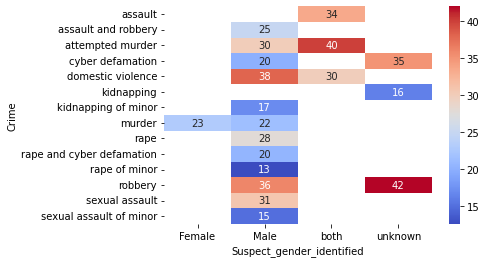

In [8]:
pivot_table = crime.pivot_table(index='Crime', columns='Suspect_gender_identified', values='Victim_age', aggfunc=np.mean)
sns.heatmap(pivot_table, annot=True, cmap='coolwarm')

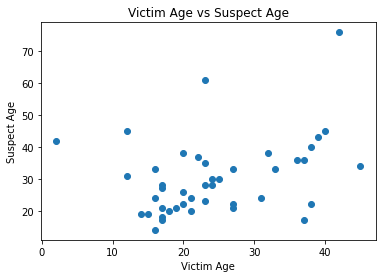

In [22]:
# Scatter plot
plt.scatter(crime['Victim_age'], crime['Suspect_age'])
plt.title('Victim Age vs Suspect Age')
plt.xlabel('Victim Age')
plt.ylabel('Suspect Age')
plt.show()

<AxesSubplot:xlabel='Police_station', ylabel='count'>

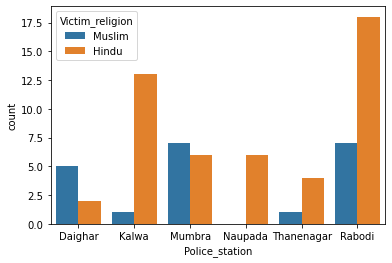

In [10]:
sns.countplot(x='Police_station',hue="Victim_religion", data=crime)

<AxesSubplot:title={'center':'Victim_age'}, xlabel='Police_station'>

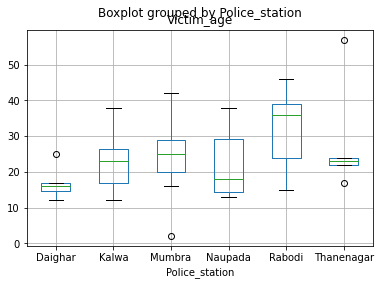

In [12]:
crime.boxplot('Victim_age',by="Police_station")

# ANOVA analysis


In [23]:
model=ols('Victim_age~Victim_gender',data=crime).fit()
model=sm.stats.anova_lm(model,type=1)
model

,df,sum_sq,mean_sq,F,PR(>F)
Victim_gender,1.0,415.963466,415.963466,3.723685,0.057819
Residual,68.0,7596.107962,111.707470,NaN,NaN


In [24]:
model=ols('Victim_age~Crime',data=crime).fit()
model=sm.stats.anova_lm(model,type=1)
model

,df,sum_sq,mean_sq,F,PR(>F)
Crime,13.0,4841.004004,372.384923,6.576194,2.191919e-07
Residual,56.0,3171.067424,56.626204,NaN,NaN


In [28]:
model=ols('Victim_age~Crime+Suspect_count',data=crime).fit()
model=sm.stats.anova_lm(model,type=1)
model

,df,sum_sq,mean_sq,F,PR(>F)
Crime,13.0,4841.004004,372.384923,6.550291,2.600623e-07
Suspect_count,1.0,44.310254,44.310254,0.779422,3.811605e-01
Residual,55.0,3126.757171,56.850130,NaN,NaN


In [25]:
model=ols('Victim_age~Police_station',data=crime).fit()
model=sm.stats.anova_lm(model,type=1)
model

,df,sum_sq,mean_sq,F,PR(>F)
Police_station,5.0,1777.238755,355.447751,3.648639,0.005751
Residual,64.0,6234.832674,97.419261,NaN,NaN


In [26]:
model=ols('Suspect_count~Crime',data=crime).fit()
model=sm.stats.anova_lm(model,type=1)
model

,df,sum_sq,mean_sq,F,PR(>F)
Crime,13.0,35.503896,2.731069,8.50525,3.700379e-09
Residual,56.0,17.981818,0.321104,NaN,NaN


In [27]:
model=ols('Suspect_count~Police_station',data=crime).fit()
model=sm.stats.anova_lm(model,type=1)
model

,df,sum_sq,mean_sq,F,PR(>F)
Police_station,5.0,2.671722,0.534344,0.673004,0.645372
Residual,64.0,50.813993,0.793969,NaN,NaN


# Naive Bayes

In [29]:
crime['Suspect_age'] = crime.groupby('Crime')['Suspect_age'].transform(lambda x: x.fillna(x.median()))

In [30]:
crime.Suspect_age.isnull().sum()

6

In [32]:
crime

,Victim_age,Victim_gender,Suspect_age,Suspect_gender_identified,Suspect_known_status,Suspect_count,Victim_religion,Police_station,Crime
0,25,Female,33.0,both,known,4,Muslim,Daighar,domestic violence
1,14,Female,19.0,Male,known,1,Muslim,Daighar,sexual assault of minor
2,17,Female,NaN,unknown,unknown,1,Muslim,Daighar,kidnapping
3,12,Female,31.0,Male,known,1,Hindu,Daighar,rape of minor
4,16,Female,NaN,unknown,unknown,1,Muslim,Daighar,kidnapping
...,...,...,...,...,...,...,...,...,...
65,37,Female,17.0,Male,known,1,Hindu,Rabodi,sexual assault
66,24,Female,33.0,both,known,3,Muslim,Rabodi,domestic violence
67,26,Female,33.0,both,known,4,Muslim,Rabodi,domestic violence
68,39,Female,33.0,Male,known,2,Hindu,Rabodi,domestic violence


In [48]:
rows_with_na = crime[crime.isna().any(axis=1)]
rows_with_na

,Victim_age,Victim_gender,Suspect_age,Suspect_gender_identified,Suspect_known_status,Suspect_count,Victim_religion,Police_station,Crime
2,17,Female,NaN,unknown,unknown,1,Muslim,Daighar,kidnapping
4,16,Female,NaN,unknown,unknown,1,Muslim,Daighar,kidnapping
5,17,Female,NaN,unknown,unknown,1,Hindu,Daighar,kidnapping
6,15,Female,NaN,unknown,unknown,1,Muslim,Daighar,kidnapping
30,42,Female,NaN,both,known,4,Muslim,Mumbra,assault
32,25,Female,NaN,both,known,2,Muslim,Mumbra,assault


In [59]:
crime.dropna(inplace=True)

In [60]:
data = pd.get_dummies(crime, columns=['Crime','Victim_gender', 'Suspect_gender_identified', 'Suspect_known_status', 'Victim_religion', 'Police_station'], drop_first=True)

In [61]:
data

,Victim_age,Suspect_age,Suspect_count,Crime_attempted murder,Crime_cyber defamation,Crime_domestic violence,Crime_kidnapping of minor,Crime_murder,Crime_rape,Crime_rape and cyber defamation,...,Suspect_gender_identified_Male,Suspect_gender_identified_both,Suspect_gender_identified_unknown,Suspect_known_status_unknown,Victim_religion_Muslim,Police_station_Kalwa,Police_station_Mumbra,Police_station_Naupada,Police_station_Rabodi,Police_station_Thanenagar
0,25,33.0,4,0,0,1,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
1,14,19.0,1,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
3,12,31.0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
7,23,28.0,1,0,0,0,0,1,0,0,...,1,0,0,0,0,1,0,0,0,0
8,23,23.0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,37,17.0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
66,24,33.0,3,0,0,1,0,0,0,0,...,0,1,0,0,1,0,0,0,1,0
67,26,33.0,4,0,0,1,0,0,0,0,...,0,1,0,0,1,0,0,0,1,0
68,39,33.0,2,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0


In [62]:
inputs=data.drop('Suspect_known_status_unknown', axis=1)

In [63]:
target=data['Suspect_known_status_unknown']

In [64]:
X_train, X_test, y_train, y_test = train_test_split(inputs, target, test_size=0.2)

In [65]:
model=GaussianNB()

In [66]:
model.fit(X_train, y_train)

GaussianNB()

In [67]:
model.score(X_test,y_test)

0.7692307692307693

In [68]:
model.predict(X_test[0:10])

array([1, 1, 0, 1, 0, 0, 1, 1, 0, 0], dtype=uint8)